In [ ]:
# Reading
* Chapter 1: Answer these simple questions to show that you have read the text
    * Q1. Describe in your own words Joel's approach to finding key connectors.
    
    He is using the number of connections in a node to describe the key connectors. using the metric **degree centrality**  (Edges per node)  
    
    * Q2. What is the meaning of node-size in Figure 1-2?
    
    The nodes are sized by degree (their degree centrality)  
    
* Chapter 2: Answer these simple questions in to show that you have read the text
    * Q1. In one line of text, what is the point of Python modules?
    
    Create easy access libraries for Python
    
    * Q2. Why does Joel use from __future__ import division?
    
            from __future__ import division
    Is used for changing integer division with float division
    
    * Q3. How are tuples different from lists?
    
    touples are immutable lists
    
    They are nice to return multiple variables form functions and can be used for multiple assignment.

In [4]:
my_list = [1, 2]
my_tuple = (1, 2)

def sum_and_product(x,y):
    return (x+y), x*y

x,y = sum_and_product(5,7)
print x,y
x,y = y,x #swap
print x,y

12 35
35 12


    

* Q4. Describe in your own words the purpose of generators.

    Its an iterator, where the results are generated lazily. Generators can only be iterated over once  
    
    Dicts has an items() this can be iterated lazily over through the method iteritems()
    
    * Qextra. 
    
    **lambdas** for inline function
    
            y = apply_to_one(lambda x:x+4)
            
    parameters can be named and get defaults
            
            def subtract(a=0,b=0):
                return a-b
                
            subtract(b=5) # returns -5
            
* Chapter 3: Carry out these simple exercises & answer a few simple questions in to show that you have read the text

### Q1. Create your own version of Figure 3-1, but change the values, axes-labels, and the plot title. Just add the plot to the bottom of the notebook you've already been working for Part 3 of today's lecture.

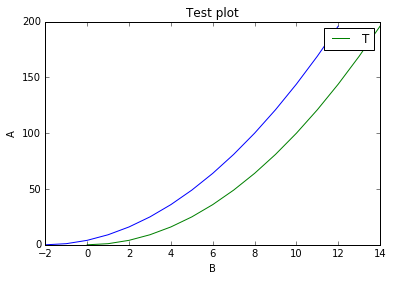

In [31]:
%matplotlib inline
from matplotlib import pyplot as plt

year = range(0,15)
gdp = [x*x for x in year] 

plt.plot(year,gdp, color='green')
plt.ylabel("A")
plt.xlabel("B")
plt.title("Test plot")
plt.legend("TEST")
#plt.hold()
plt.plot([x-2 for x in year],gdp)
plt.show()

### Q2. Create your own version of Figure 3-2, but change the values, axes-labels, and the plot title. Just add the plot to the bottom of the notebook you've already been working for Part 3 of today's lecture.

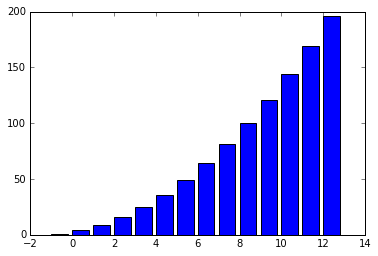

In [32]:
plt.bar([x-2 for x in year],gdp)
plt.show()

### Q3. What's the problem with the plot in Figure 3-4? Use Google (or your memory) find an example of this type of abuse on the internet and include it in your Notebook.

Axis limits are vey tight on the y axis, and one would expect zero at the bottom of most bar charts

### Q4. Create your own version of Figure 3-9 and add to the notebook. Explain in your own words why 3-9 is a better representation of the data than 3-8.

Scatter plot, keep the axis scaling constrained

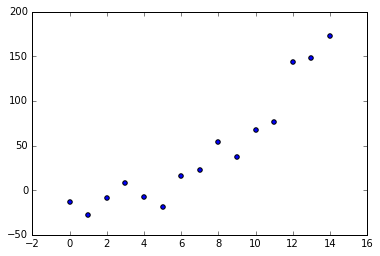

In [44]:
import random
plt.scatter(year,[x-random.random()*50 for x in gdp])
plt.show()

# Twitter API
Load twitter API and get access via OAuth
for documentation of python package access https://github.com/sixohsix/twitter

In [91]:
import twitter


# Go to http://twitter.com/apps/new to create an app and get these items
# See https://dev.twitter.com/docs/auth/oauth for more information on Twitter's OAuth implementation

CONSUMER_KEY = 'rvn9XezeYEdk1syO8wh4spR1B'
CONSUMER_SECRET = 'BHZbLrkqzHZ44NEIPh37o71mMHXo3CLZkJM0BCKF3Uj2uvoIcO'
OAUTH_TOKEN = '4871426597-rBoiqRJ1Dx9sEKwWK2VIhc2J1ZS1RWiAl7i1fFc'
OAUTH_TOKEN_SECRET = 'EL7HDB2fhXQ7n2vlAsMJO1RBj8hjQ9BsNAwBf30vXV5vK'

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(domain='api.twitter.com', 
                              api_version='1.1',
                              auth=auth
                             )


Retrieve trends from denmark

check out (http://woeid.rosselliot.co.nz/lookup/) to look up woeid's

In [111]:
import json
# With an authenticated twitter_api in existence, you can now use it to query Twitter resources as usual.
# However, the trends resource is cleaned up a bit in v1.1, so requests are a bit simpler than in the latest
# printing. See https://dev.twitter.com/docs/api/1.1/get/trends/place

# The Yahoo! Where On Earth ID for the entire world is 1
WOE_ID = 1 #denmark is 23424796 

# Prefix id with the underscore for query string parameterization.
# Without the underscore, it's appended to the URL itself
trends = twitter_api.trends.place(_id=WOE_ID)[0]
#print json.dumps(trends, indent=1)

Extract trends

In [112]:
print trends.keys()
print trends['trends'][0].keys()
for trend in trends['trends']:
    print "%s, %s" % (trend['tweet_volume'], trend['name'])
    
len(trends['trends'])

[u'created_at', u'trends', u'as_of', u'locations']
[u'url', u'query', u'tweet_volume', u'name', u'promoted_content']
11352, #FelizMartes
222624, #ツインテールの日
None, #مشكلتي_اني
21388, #GroundhogDay
None, #파는장르_세계관의_일반인이되면
13740, Niall is in Bali
None, Kim and Amber
13724, win10
21817, Windows10
None, #DiaDeLaMarmota
None, #9GreaseLive
14703, #DuyarsızKalma
None, #TheFutureOfLuxury
None, #chandeleur
27083, #ACupidoYoLePido
33868, #LoQueMasNecesitariaEs
None, #членфолловитпрезерватив
None, #HaniOlurdaBirGün
11301, #ЗамениЛюбоеНазваниеСловомГей
14817, #TercaDetremuraSdv
37857, #MOOvies
11876, #MetinOktay
None, #탐라에_세번_외치면_이루어진다
None, #男性器への褒め言葉
None, #adidasUprisingMUM
None, #cirinnamoreremo
1119473, #ALDUBPanibagongLihim
None, #RenegadeSecretLaunch
None, #PrintYourPyaar
None, #Section377
None, #НасосВсехСоцСетей
23457, #IsupportPIAprotestors
10534, #KoiHaiHamesha
10783, #yakışan
None, #アニメについて語ってください
None, #charitytuesday
65760, #PangakoNgRebelasyon
12971, #زد_رصيدك81
None, #RemplaceUnMotPar

50

In [138]:
# Like all other APIs, search requests now require authentication and have a slightly different request and
# response format. See https://dev.twitter.com/docs/api/1.1/get/search/tweets

q = "@suneman"
count = 10

search_results = twitter_api.search.tweets(q=q, count=count)
statuses = search_results['statuses']

# v1.1 of Twitter's API provides a value in the response for the next batch of results that needs to be parsed out
# and passed back in as keyword args if you want to retrieve more than one page. It appears in the 'search_metadata'
# field of the response object and has the following form:'?max_id=313519052523986943&q=NCAA&include_entities=1'
# The tweets themselves are encoded in the 'statuses' field of the response
    
for status in statuses:
    print 
    print status['text']
    print "\n"



RT @suneman: killer new interactive twitter dataviz: https://t.co/VncRJ4Iaho (full disclosure: by @amislove, @soegaarducph, me) https://t.c…




In [123]:
print json.dumps(search_results, indent=1)

{
 "search_metadata": {
  "count": 3, 
  "completed_in": 0.018, 
  "max_id_str": "691685033577422848", 
  "since_id_str": "0", 
  "refresh_url": "?since_id=691685033577422848&q=%40suneman&include_entities=1", 
  "since_id": 0, 
  "query": "%40suneman", 
  "max_id": 691685033577422848
 }, 
 "statuses": [
  {
   "contributors": null, 
   "truncated": false, 
   "text": "RT @suneman: killer new interactive twitter dataviz: https://t.co/VncRJ4Iaho (full disclosure: by @amislove, @soegaarducph, me) https://t.c\u2026", 
   "is_quote_status": false, 
   "in_reply_to_status_id": null, 
   "id": 691685033577422848, 
   "favorite_count": 0, 
   "source": "<a href=\"http://twitter.com\" rel=\"nofollow\">Twitter Web Client</a>", 
   "retweeted": false, 
   "coordinates": null, 
   "entities": {
    "symbols": [], 
    "user_mentions": [
     {
      "id": 16174436, 
      "indices": [
       3, 
       11
      ], 
      "id_str": "16174436", 
      "screen_name": "suneman", 
      "name": "Sune L

Remember it is possible to **geocode** searches

    search_results = twitter_api.search.tweets(q="dfds", geocode="55.678952,12.533573,10km", count=count)

In [258]:
count = 50
search_results = twitter_api.search.tweets(q="pearl seaways", count=count)

In [259]:
for status in search_results['statuses']:
    print status['user']['screen_name']
    print " " + status['text']
    try:
        print status['place']['full_name'] + "\n"
    except TypeError:
        print "\n"

MaritimeSpatial
 #enav e-Navigation Underway 2016 is kicking off aboard DFDS Pearl Seaways. Standby for heavy weather! https://t.co/OXG0PdKwbS


Maritimegeek
 RT @DFDSGroup: #DFDS ferry PEARL SEAWAYS spent 3 weeks in the shipyard for a thorough makeover. Most visible is her new look. https://t.co/…


davidjohnwalker
 RT @DFDSGroup: #DFDS ferry PEARL SEAWAYS spent 3 weeks in the shipyard for a thorough makeover. Most visible is her new look. https://t.co/…


PortsOfCallUK
 RT @DFDSGroup: Today, Pearl Seaways returned to #Copenhagen after 3 weeks in dock for a full upgrade: https://t.co/R5sjOA9tyT https://t.co/…


DFDSGroup
 Today, Pearl Seaways returned to #Copenhagen after 3 weeks in dock for a full upgrade: https://t.co/R5sjOA9tyT https://t.co/0kGpqqmx5r


NationalMSC
 RT @DFDSGroup: #DFDS ferry PEARL SEAWAYS spent 3 weeks in the shipyard for a thorough makeover. Most visible is her new look. https://t.co/…


philter66
 RT @DFDSGroup: #DFDS ferry PEARL SEAWAYS spent 3 weeks in the shi

In [260]:
search_results = twitter_api.statuses.user_timeline(screen_name="DFDSgroup")

In [262]:
for result in search_results:
    print result['text']
    print "\n"

RT @KarmenuVella: In @HavenGent with @_EU_Shipowners &amp; @DFDSGroup to see ship 'scrubber' cleaning technology https://t.co/UVDDFPHk5g


RT @HavenGent: #havengent verwelkomt EU commissaris Milieu @KarmenuVella bij @DFDSGroup &amp; @MathiasDeClercq #duurzaam #zeevaart https://t.co…


RT @PVerhoevenECSA: @KarmenuVella Looking forward to welcoming you onboard this afternoon! @DFDSGroup @HavenGent https://t.co/CJVjeBZ1qc


It's maintenance time at #DFDS. Many ships get an upgrade: https://t.co/Hl2oPD7aJP


Today, Pearl Seaways returned to #Copenhagen after 3 weeks in dock for a full upgrade: https://t.co/R5sjOA9tyT https://t.co/0kGpqqmx5r


EU Commissioner @KarmenuVella will visit #DFDS @havengent to view the ship scrubber system: (in Dutch) https://t.co/4A67pxBpJg


#DFDS ferry PEARL SEAWAYS spent 3 weeks in the shipyard for a thorough makeover. Most visible is her new look. https://t.co/LqaDxGNtR4


I added a video to a @YouTube playlist https://t.co/LqaDxGNtR4 Ferry gets extreme makeo

In [178]:
search_results = twitter_api.followers.list(screen_name="suneman")

In [192]:
users = search_results['users']

for user in users:
    if user['geo_enabled']:
        print user['name']
        print json.dumps(user, indent = 1)

Ryo Christopher Kato
{
 "follow_request_sent": false, 
 "has_extended_profile": false, 
 "profile_use_background_image": true, 
 "default_profile_image": false, 
 "id": 15897720, 
 "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/813417084/a4d4722c92a07aebf024b948de6a23f7.jpeg", 
 "verified": false, 
 "blocked_by": false, 
 "profile_text_color": "663B12", 
 "muting": false, 
 "profile_image_url_https": "https://pbs.twimg.com/profile_images/3366478839/17da56ed4e6371c729d3b3d7f65db12b_normal.jpeg", 
 "profile_sidebar_fill_color": "DAECF4", 
 "entities": {
  "url": {
   "urls": [
    {
     "url": "http://t.co/m1dlsKHPNa", 
     "indices": [
      0, 
      22
     ], 
     "expanded_url": "http://www.linkedin.com/pub/ryo-christopher-kato/25/830/574/", 
     "display_url": "linkedin.com/pub/ryo-christ\u2026"
    }
   ]
  }, 
  "description": {
   "urls": []
  }
 }, 
 "followers_count": 104, 
 "profile_sidebar_border_color": "FFFFFF", 
 "id_str": "1589

In [155]:
print json.dumps(search_results, indent=1)

{
 "next_cursor_str": "1523454187114312153", 
 "previous_cursor": 0, 
 "users": [
  {
   "follow_request_sent": false, 
   "has_extended_profile": false, 
   "profile_use_background_image": true, 
   "default_profile_image": true, 
   "id": 4871426597, 
   "profile_background_image_url_https": null, 
   "verified": false, 
   "blocked_by": false, 
   "profile_text_color": "333333", 
   "muting": false, 
   "profile_image_url_https": "https://abs.twimg.com/sticky/default_profile_images/default_profile_2_normal.png", 
   "profile_sidebar_fill_color": "DDEEF6", 
   "entities": {
    "description": {
     "urls": []
    }
   }, 
   "followers_count": 0, 
   "profile_sidebar_border_color": "C0DEED", 
   "id_str": "4871426597", 
   "profile_background_color": "F5F8FA", 
   "listed_count": 0, 
   "is_translation_enabled": false, 
   "utc_offset": null, 
   "statuses_count": 0, 
   "description": "", 
   "friends_count": 1, 
   "location": "", 
   "profile_link_color": "2B7BB9", 
   "profile_i